<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods exams

Exam 01

<div align="right" style="width: 99.5%;">
Estiven Castrillon
</div>

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

# Quiz 2

**1.** Supongamos que tienes una muestra de material radiactivo y deseas determinar la velocidad a la que disminuye la cantidad de material radioactivo en función del tiempo. El decaimiento radioactivo sigue una ley exponencial y se puede describir mediante la siguiente ecuación:

$$N(t)=N_0e^{-\lambda t}$$

Donde:

$N(t)$ es la cantidad de material radioactivo en el tiempo $t$

$N_0$ es la cantidad inicial de material radioactivo.

$\lambda$ es una constante de decaimiento

$t$ es el tiempo

Para encontrar la tasa de cambio de $N(t)$ con respecto al tiempo $t$, es decir, la velocidad de decaimiento radioactivo, puedes calcular la derivada de $N(t)$ con respecto a $t$:

**A** Encuentre la velocidad de decaimiento usando la libreria simbololica, luego paselo a una libreria numerica y grafique.

**B** Compruebe el resultado usando diferenciacion de scipy (grafique)

tome $λ=10^{-1}$ y $N_0=6.7x10^{3
}$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
from scipy import misc

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# A) velocidad de decaimiento simbólica y numérica
N_0 = 6.7e3
lambda_ = 1e-1
t = symbols('t')
funcion_decaimiento = N_0 * exp(-lambda_ * t)

velocidad_decaimiento_simb = diff(funcion_decaimiento)
print(f'Derivada simbólica: {velocidad_decaimiento_simb}')

velocidad_decaimiento_num = lambdify(t, velocidad_decaimiento_simb, 'numpy')
print(f'Derivada numérica: {velocidad_decaimiento_num} :p')

Derivada simbólica: -670.0*exp(-0.1*t)
Derivada numérica: <function _lambdifygenerated at 0x000001F8672372E0> :p


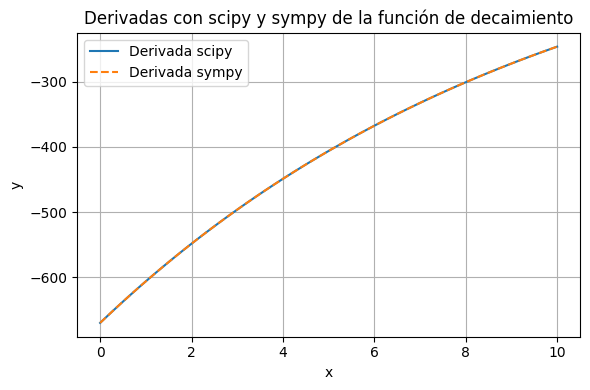

In [3]:
# B) Comprobando con scipy
x = np.linspace(0, 10, 100)
plt.figure(figsize=(6, 4))

derivada_scipy = misc.derivative(lambdify(t, funcion_decaimiento, 'numpy'), x, dx=10e-5)
derivada_sympy = velocidad_decaimiento_num(x)

plt.plot(x, derivada_scipy, label='Derivada scipy')
plt.plot(x, derivada_sympy, label='Derivada sympy', linestyle='--')
plt.title('Derivadas con scipy y sympy de la función de decaimiento')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

**2** Supongamos que tienes un objeto en movimiento bajo la influencia de una fuerza y has registrado la posición del objeto en función de la fuerza aplicada. Los datos recopilados son los siguientes:

posicion = [0.69,0.3,0.17,0.11]

tiempo = [1.2, 1.8, 2.4, 3.0]

**A** Genere almenos 100 datos apartir de algun metodo de interpolacion y grafique.

**B** Encuentre la velocidad y grafique.

**C** Encuentre la aceleracion y grafique.


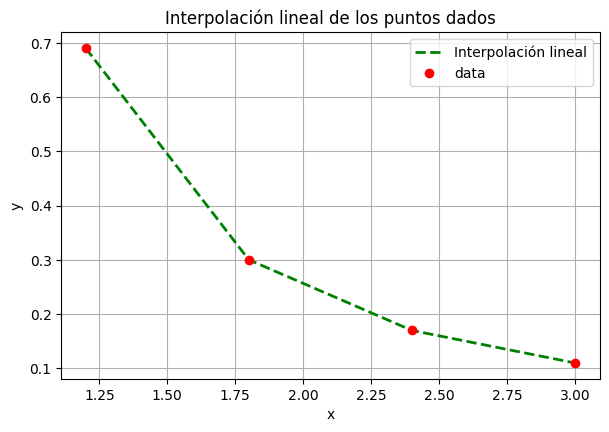

In [4]:
# A) interpolación y gráfica
posicion = np.array([0.69,0.3,0.17,0.11])
tiempo = np.array([1.2, 1.8, 2.4, 3.0])
tiempo_nuevo = np.linspace(1.2, 3, 100)

# Método de interpolación lineal tomado de la clase 9
def LinearInterpolator(x, Xn, Yn ):

    #Sorting data, in case they are not
    Yn = Yn[np.argsort(Xn)]
    Xn = Xn[np.argsort(Xn)]

    #Detecting size of x
    try:
        Ninter = len(x)
    except:
        Ninter = 1
        x = np.array([x,])

    #Constructing function for each iteration
    term = lambda x, i: (Yn[i+1] - Yn[i])/(Xn[i+1] - Xn[i])*(x - Xn[i]) + Yn[i]

    #Detecting intervals for each x, [x_i, x_i+1] and interpolating
    y = []
    for n in range(Ninter):
        for i in range(len(Xn)):
            if (x[n] <= Xn[i]):
                break
        y.append(term(x[n],i-1))
    return np.array(y)

# Interpolación lineal
y = LinearInterpolator(tiempo_nuevo, tiempo, posicion)

plt.figure(figsize=(6, 4))
plt.plot(tiempo_nuevo, y, color="green", linewidth=2, linestyle="--",label="Interpolación lineal" )
plt.plot(tiempo, posicion, "o", color="red", label="data" ) # puntos de interpolación

plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel( "x" )
plt.ylabel( "y" )
plt.title( "Interpolación lineal de los puntos dados" )
plt.show()

In [5]:
print(f'Confirmación tamaño interpolación de 100 datos: {len(y)}')

Confirmación tamaño interpolación de 100 datos: 100


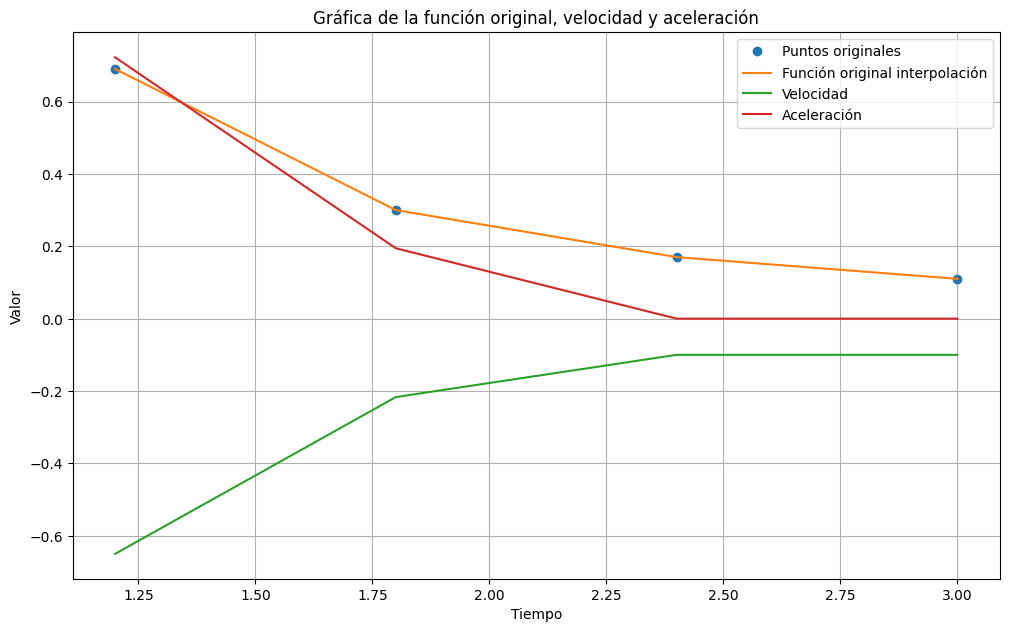

In [9]:
# Literales B) y C)

# Para la velocidad encontramos la primera derivada de los puntos
# Derivada discreta
def derivada(x,y):
  dy=[]
  for i in range(1,len(x)):
    d=(y[i]-y[i-1])/(x[i]-x[i-1])
    dy.append(d)
  return dy

velocidad = derivada(tiempo, posicion)
velocidad.append(velocidad[-1])

# Para la aceleración encontramos la segunda derivada de los puntos,
# es decir, la derivada de la primera derivada

aceleracion = derivada(tiempo, velocidad)
aceleracion.append(aceleracion[-1])

plt.figure(figsize=(10, 6))
plt.plot(tiempo, posicion, 'o', label='Puntos originales')
plt.plot(tiempo_nuevo, y, label='Función original interpolación')
plt.plot(tiempo, velocidad, label='Velocidad')
plt.plot(tiempo, aceleracion, label='Aceleración')

plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Gráfica de la función original, velocidad y aceleración")

plt.show()